# Self Organizing Map (SOM)

In [18]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy

## Importing Dataset ==> fashion_mnist

In [84]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = train_x[:1000]
train_y = train_y[:1000]
test_x = test_x[1000:4000]
test_y = test_y[1000:4000]

In [85]:
print('Train: x=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: x=%s, y=%s' % (test_x.shape, test_y.shape))
print('Input shape is:', train_x[0].shape)

Train: x=(1000, 28, 28), y=(1000,)
Test: x=(3000, 28, 28), y=(3000,)
Input shape is: (28, 28)


In [4]:
fashion_mnist_labels=["T-shirt/top",
                      "Trouser",
                      "pullover",
                      "Dress",
                      "Coat",
                      "sandal",
                      "Shirt",
                      "Sneaker",
                      "Bag",
                      "Ankle boot"]

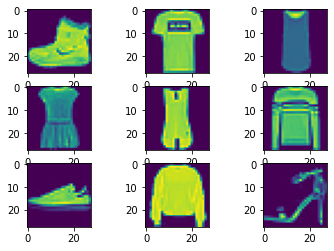

In [5]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_x[i])
pyplot.show()

Flattenig Images

In [86]:
def flattening_iamges(images):
  ans = []
  for i in range(len(images)):
    ans.append(images[i].flatten())
  return np.array(ans)

train_x = flattening_iamges(train_x)
train_y = flattening_iamges(train_y)
test_x = flattening_iamges(test_x)
test_y = flattening_iamges(test_y)
print('train_x shape:', train_x.shape)

train_x shape: (1000, 784)


### Function to Present weight matrix in 420*420

In [56]:
def show_420(w):
  w_ = copy.deepcopy(w)
  im_i = np.array([])
  for i in range(15):
    im_j = np.array([])
    for j in range(15):
      temp = w_[:,i,j]
      temp = temp.reshape(28,28)
      if j==0:
        im_j = copy.deepcopy(temp)
      else:
        im_j = np.concatenate((im_j, temp), axis=1)
    if i==0:
      im_i = copy.deepcopy(im_j)
    else:
      im_i = np.concatenate((im_i, im_j), axis=0)
  pyplot.imshow(im_i)
  pyplot.show()

### Function to plot Histogram

In [147]:
def plot_histograms(w):
  min_ind_list_pre = []
  for k in range(len(test_x)):
      distance = np.zeros([15, 15])
      for i in range(15):
        for j in range(15):
          distance[i][j] = sum((w[:, i, j] - test_x[k])**2)
      ind = np.unravel_index(np.argmin(distance, axis=None), distance.shape)
      min_ind_list_pre.append(ind)

  mapped_input_dict = {}
  for item in min_ind_list_pre:
    if (item[0]*15+item[1]) not in mapped_input_dict:
      mapped_input_dict[item[0]*15+item[1]] = 1
    else:
      mapped_input_dict[item[0]*15+item[1]] += 1

  mapped_input_dict
  y_axis = list(mapped_input_dict.keys())
  x_axis = list(mapped_input_dict.values())
  plt.barh(y_axis, x_axis)
  plt.ylabel('Output Nodes')
  plt.xlabel('Count')
  plt.show()

  min_ind_list = []
  for item in min_ind_list_pre:
    if item not in min_ind_list:
      min_ind_list.append(item)

  class_dict = {}
  for i in range(len(min_ind_list_pre)):
    node_num = min_ind_list_pre[i][0]*15 + min_ind_list_pre[i][1]
    if (node_num) not in class_dict:
      class_dict[node_num] = [test_y[i][0]]
    elif class_dict[node_num] and test_y[i][0] not in class_dict[node_num]:
        class_dict[node_num].append(test_y[i][0])

  class_count_dict = {}
  for key, value in class_dict.items():
    class_count_dict[key] = len(value)

  y_axis = list(class_count_dict.keys())
  x_axis = list(class_count_dict.values())
  plt.figure(figsize = (18,5))
  plt.barh(y_axis, x_axis)
  plt.ylabel("Output Nodes")
  plt.xlabel("No of mapped class to nth node")
  plt.show()

## Training SOM Model

before first epoch:


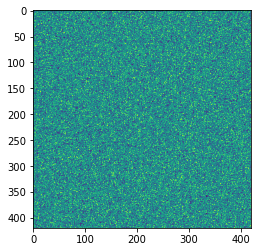

epoch: 1


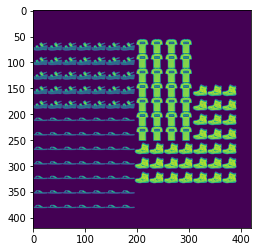

epoch: 2


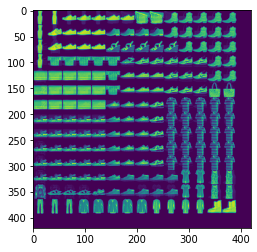

epoch: 3


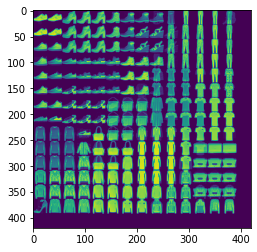

epoch: 4


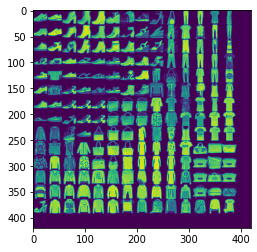

epoch: 5


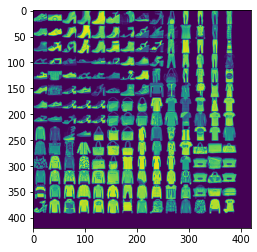

epoch: 6


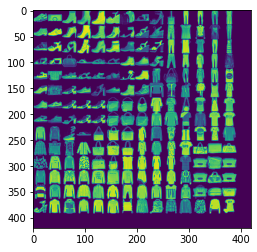

epoch: 7


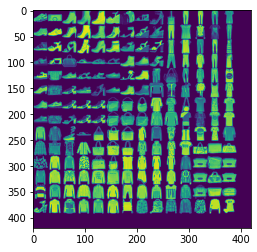

epoch: 8


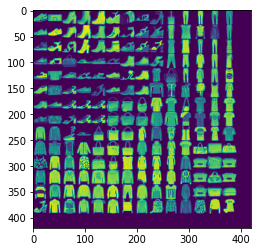

epoch: 9


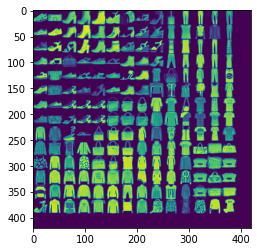

epoch: 10


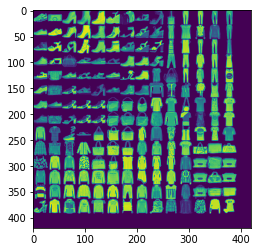

epoch: 11


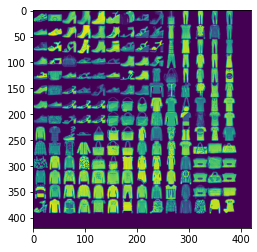

epoch: 12


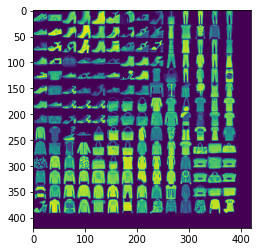

epoch: 13


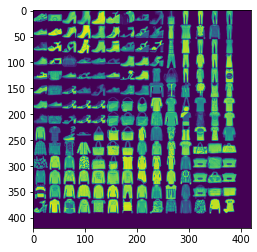

epoch: 14


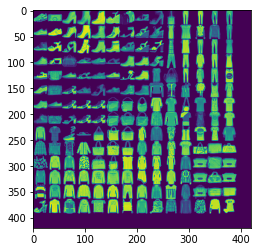

epoch: 15


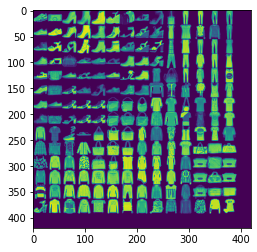

epoch: 16


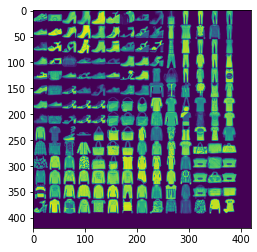

epoch: 17


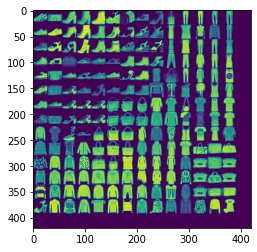

epoch: 18


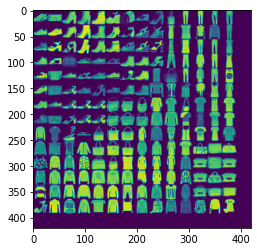

epoch: 19


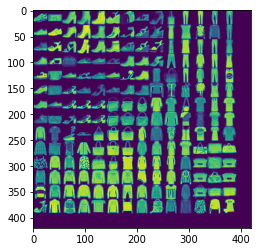

epoch: 20


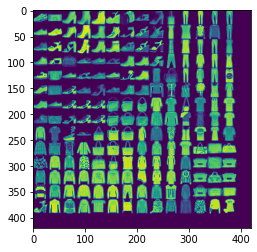

In [150]:
# step 0
w = np.random.rand(28*28, 15, 15)
print('before first epoch:')
show_420(w)
alpha = 1
decay_factor = 0.9
R = 3
epoch = 0
num_of_epochs = 20
# step 1
while epoch < num_of_epochs:
  print('epoch:', epoch+1)
  # step 2
  for k in range(len(train_x)):
    # step 3
    distance = np.zeros([15, 15])
    for i in range(15):
      for j in range(15):
        distance[i][j] = sum((w[:,i,j] - train_x[k])**2)
    # step 4
    ind = np.unravel_index(np.argmin(distance, axis=None), distance.shape)
    # step 5
    for i in range(-R, R+1):
      for j in range(-R, R+1):
        if ind[0]-R<0 or ind[1]-R<0 or ind[0]+R+1>14 or ind[1]+R+1>14:
          continue
        w[:, ind[0]+i, ind[1]+j] += alpha*(train_x[k] - w[:, ind[0]+i, ind[1]+j])
  # step 6
  alpha = decay_factor*alpha
  epoch += 1
  if R!=0:
    R -= 1
  show_420(w)

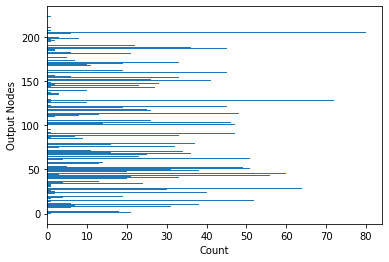

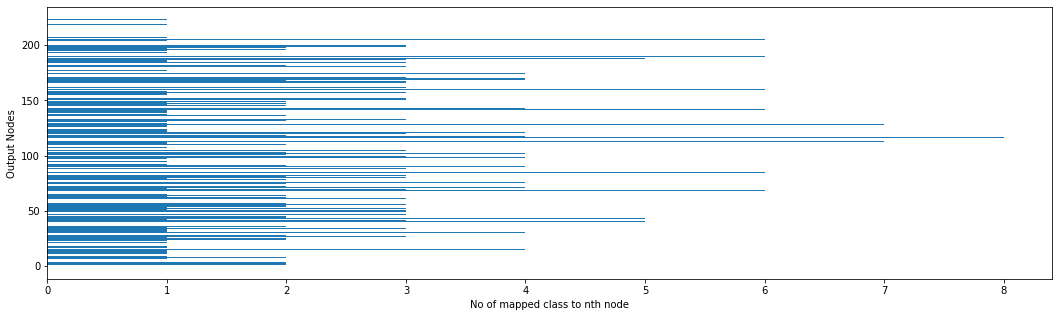

In [151]:
plot_histograms(w)